In [14]:
import pandas as pd
import plotly.express as px
import plotly.graph_objects as go
pd.set_option('display.max_columns', None)

data = pd.read_excel('nba.xlsx') # gets data from excel file

# Preperation

In [15]:
# gets rid of Rank and Eff columns
data.drop(columns=['RANK','EFF'], inplace=True)

In [16]:
data['season_start_year'] = data['Year'].str[:4].astype(int)

In [17]:
data['Season_type'].replace('Regular%20Season','RS', inplace=True)

/var/folders/rk/2404_76n00s3p8wwtcpskmtr0000gn/T/ipykernel_76526/1249339338.py:1: FutureWarning:

A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.





In [18]:
rs_df = data[data['Season_type']=='RS']
playoffs_df = data[data['Season_type']=='Playoffs']

In [19]:
total_cols = ['MIN','FGM','FGA','FG3M','FG3A','FTM','FTA',
              'OREB','DREB','REB','AST','STL','BLK','TOV','PF','PTS']

# Minutes Distribution | Regular Season vs. Playoffs

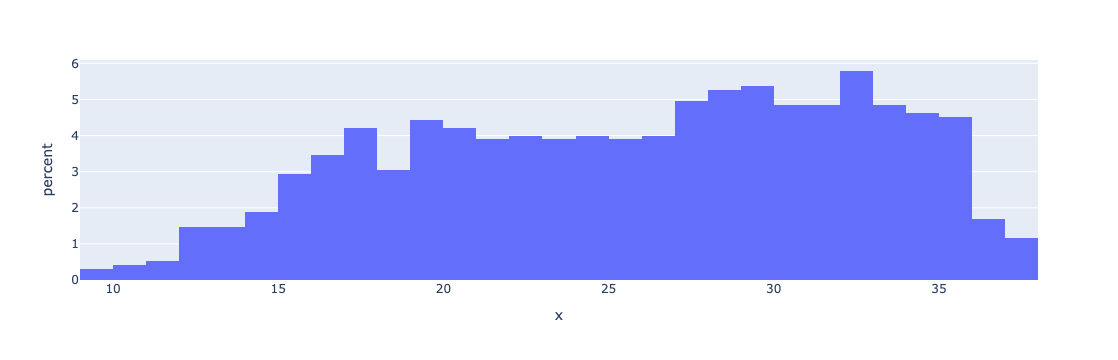

In [20]:
# shows the minute distribution for the regular season
rs_fig = px.histogram(x=rs_df['MIN'], histnorm='percent')
rs_fig.show()

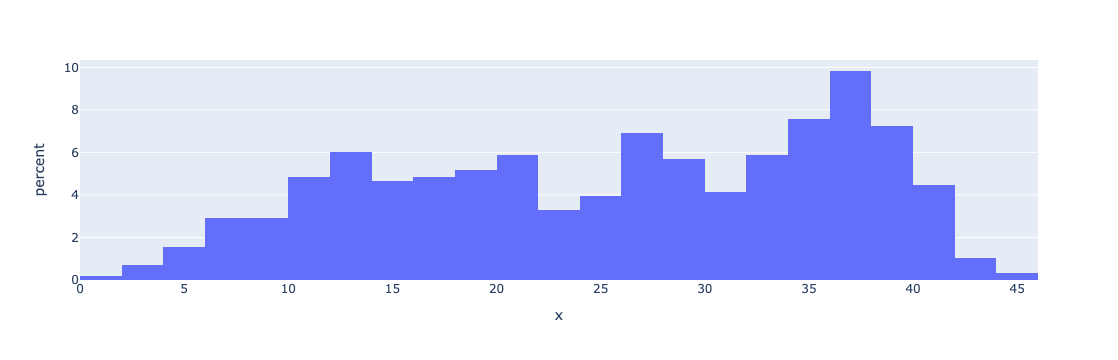

In [21]:
# shows the minute distribution for the playoffs
fig = px.histogram(x=playoffs_df['MIN'], histnorm='percent')
fig.show()

# How has the game changed in the past 4 years?

In [22]:
existing_cols = [col for col in total_cols if col in data.columns]

# group by 'season_start_year' and sum existing columns
change_df = data.groupby('season_start_year')[existing_cols].sum().reset_index()

# calculates POSS_est
change_df['POSS_est'] = change_df['FGA'] - change_df['OREB'] + change_df['TOV'] + 0.44 * change_df['FTA']
change_df = change_df[['season_start_year'] + ['POSS_est'] + existing_cols]

# calculates ratios
if 'FGA' in change_df and 'FGM' in change_df:
    change_df['FG%'] = change_df['FGM'] / change_df['FGA']
if 'FG3A' in change_df and 'FG3M' in change_df:
    change_df['3PT%'] = change_df['FG3M'] / change_df['FG3A']
if 'FTA' in change_df and 'FTM' in change_df:
    change_df['FT%'] = change_df['FTM'] / change_df['FTA']
if 'AST' in change_df and 'FGM' in change_df:
    change_df['AST%'] = change_df['AST'] / change_df['FGM']
if 'FGA' in change_df and 'FG3A' in change_df:
    change_df['FG3A%'] = change_df['FG3A'] / change_df['FGA']
if 'PTS' in change_df and 'FGA' in change_df:
    change_df['PTS/FGA'] = change_df['PTS'] / change_df['FGA']
if 'FGM' in change_df and 'FG3M' in change_df:
    change_df['FG3M/FGM'] = change_df['FG3M'] / change_df['FGM']
if 'FGA' in change_df and 'FTA' in change_df:
    change_df['FTA/FGA'] = change_df['FTA'] / change_df['FGA']
if 'PTS' in change_df and 'FGA' in change_df and 'FTA' in change_df:
    change_df['TRU%'] = 0.5 * change_df['PTS'] / (change_df['FGA'] + 0.475 * change_df['FTA'])
if 'AST' in change_df and 'TOV' in change_df:
    change_df['AST_TOV'] = change_df['AST'] / change_df['TOV']

change_df

,season_start_year,POSS_est,MIN,FGM,FGA,FG3M,FG3A,FTM,FTA,OREB,DREB,REB,AST,STL,BLK,TOV,PTS,FG%,3PT%,FT%,AST%,FG3A%,PTS/FGA,FG3M/FGM,FTA/FGA,TRU%,AST_TOV
0,2020,4057.904,9662.4,1654.0,3545.7,508.6,1378.7,710.1,904.1,394.6,1350.5,1745.3,964.4,288.5,182.8,509.0,4525.8,0.466481,0.368898,0.785422,0.583071,0.388837,1.276419,0.307497,0.254985,0.569262,1.894695
1,2021,4051.844,9645.7,1615.4,3507.5,506.8,1419.9,708.8,905.1,384.1,1339.6,1725.0,977.5,296.1,182.8,530.2,4444.1,0.460556,0.356927,0.783118,0.605113,0.404818,1.267028,0.313730,0.258047,0.564341,1.843644
2,2022,4256.512,10101.1,1746.8,3714.3,521.1,1452.2,768.9,974.8,431.6,1369.1,1800.1,1040.4,297.4,195.6,544.9,4782.7,0.470290,0.358835,0.788777,0.595603,0.390975,1.287645,0.298317,0.262445,0.572459,1.909341
3,2023,4091.520,9805.4,1701.7,3606.2,505.9,1397.9,693.4,878.0,410.1,1322.3,1728.9,1052.2,287.6,202.6,509.1,4601.2,0.471882,0.361900,0.789749,0.618323,0.387638,1.275914,0.297291,0.243470,0.571826,2.066785


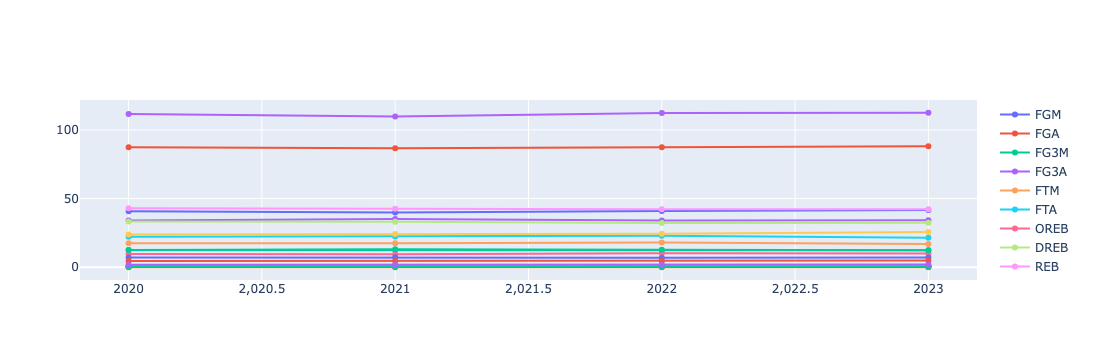

In [23]:
# changes per 100 
change_per100_df = change_df.copy()

for col in change_per100_df.columns[3:18]:
    change_per100_df[col] = (change_per100_df[col]/change_per100_df['POSS_est'])*100

change_per100_df.drop(columns=['MIN','POSS_est'], inplace=True)
change_per100_df

fig = go.Figure()
for col in change_per100_df.columns[1:]:
    fig.add_trace(go.Scatter(x=change_per100_df['season_start_year'],
                             y=change_per100_df[col], name=col))
fig.show()

# Comparing Regular Season to Playoffs

In [24]:
# List of columns expected
total_cols = ['FGA', 'OREB', 'TOV', 'FTA', 'MIN', 'FGM', 'FG3M', 'FG3A', 'FTM', 'AST', 'PTS']

# Ensure columns in total_cols exist in the dataframe
existing_total_cols = [col for col in total_cols if col in rs_df.columns]

rs_change_df = rs_df.groupby('season_start_year')[existing_total_cols].sum().reset_index()
playoffs_change_df = playoffs_df.groupby('season_start_year')[existing_total_cols].sum().reset_index()

for df in [rs_change_df, playoffs_change_df]:
    df['POSS_est'] = df['FGA'] - df['OREB'] + df['TOV'] + 0.44 * df['FTA']
    df['POSS_per_48'] = (df['POSS_est'] / df['MIN']) * 48 * 5
    
    df['FG%'] = df['FGM'] / df['FGA']
    df['3PT%'] = df['FG3M'] / df['FG3A']
    df['FT%'] = df['FTM'] / df['FTA']
    df['AST%'] = df['AST'] / df['FGM']
    df['FG3A%'] = df['FG3A'] / df['FGA']
    df['PTS/FGA'] = df['PTS'] / df['FGA']
    df['FG3M/FGM'] = df['FG3M'] / df['FGM']
    df['FTA/FGA'] = df['FTA'] / df['FGA']
    df['TRU%'] = 0.5 * df['PTS'] / (df['FGA'] + 0.475 * df['FTA'])
    df['AST_TOV'] = df['AST'] / df['TOV']
    
    for col in existing_total_cols:
        df[col] = 100 * df[col] / df['POSS_est']
    
    df.drop(columns=['MIN', 'POSS_est'], inplace=True)
    
rs_change_df


,season_start_year,FGA,OREB,TOV,FTA,FGM,FG3M,FG3A,FTM,AST,PTS,POSS_per_48,FG%,3PT%,FT%,AST%,FG3A%,PTS/FGA,FG3M/FGM,FTA/FGA,TRU%,AST_TOV
0,2020,86.923848,9.495652,12.990334,21.776067,40.987014,12.468681,33.574052,17.065502,24.858918,111.543512,102.019227,0.471528,0.371379,0.783682,0.606507,0.386247,1.283233,0.304211,0.250519,0.573385,1.913647
1,2021,87.307931,9.483256,12.784716,21.342292,40.459773,12.860201,35.716159,16.642379,25.048986,110.406235,102.202125,0.463415,0.360067,0.779784,0.619108,0.409083,1.264561,0.317852,0.244448,0.566502,1.959291
2,2022,86.593655,9.825007,12.904268,23.470646,41.428718,12.184917,33.453470,18.457213,24.861635,113.543609,103.020591,0.478427,0.364235,0.786396,0.600106,0.386327,1.311223,0.294118,0.271043,0.580832,1.926621
3,2023,87.895712,9.926885,12.497577,21.667262,42.134364,12.645231,34.179983,17.055918,26.551199,113.969876,103.203126,0.479368,0.369960,0.787175,0.630155,0.388870,1.296649,0.300117,0.246511,0.580368,2.124508


In [25]:
# Check lengths of DataFrames
print(len(rs_change_df), len(playoffs_change_df))

# Ensure both DataFrames cover the same range of seasons
common_seasons = rs_change_df['season_start_year'].isin(playoffs_change_df['season_start_year'])
rs_change_df = rs_change_df[common_seasons]

common_seasons = playoffs_change_df['season_start_year'].isin(rs_change_df['season_start_year'])
playoffs_change_df = playoffs_change_df[common_seasons]

# Perform comparison calculation
comp_change_df = round(100 * (playoffs_change_df.set_index('season_start_year') - rs_change_df.set_index('season_start_year')) / rs_change_df.set_index('season_start_year'), 3)

# Reset index and assign season_start_year
comp_change_df = comp_change_df.reset_index()
comp_change_df['season_start_year'] = rs_change_df['season_start_year'].values

comp_change_df


4 4


,season_start_year,FGA,OREB,TOV,FTA,FGM,FG3M,FG3A,FTM,AST,PTS,POSS_per_48,FG%,3PT%,FT%,AST%,FG3A%,PTS/FGA,FG3M/FGM,FTA/FGA,TRU%,AST_TOV
0,2020,1.404,6.476,-9.256,6.226,-1.490,1.400,3.218,6.837,-11.828,-0.031,-3.171,-2.855,-1.762,0.575,-10.495,1.789,-1.416,2.934,4.754,-1.912,-2.835
1,2021,-2.245,-0.101,6.209,12.317,-3.860,-7.233,-4.974,13.498,-9.740,-1.734,-3.502,-1.652,-2.377,1.052,-6.117,-2.791,0.522,-3.508,14.896,-1.012,-15.017
2,2022,2.143,8.902,-2.212,-6.740,-2.619,1.311,5.513,-5.918,-4.684,-2.892,-4.928,-4.662,-3.982,0.880,-2.121,3.299,-4.929,4.036,-8.697,-3.977,-2.528
3,2023,0.779,2.737,-1.236,-2.712,-3.639,-6.261,-0.117,-1.798,-8.868,-3.745,-7.931,-4.384,-6.151,0.939,-5.427,-0.889,-4.489,-2.721,-3.464,-4.141,-7.728


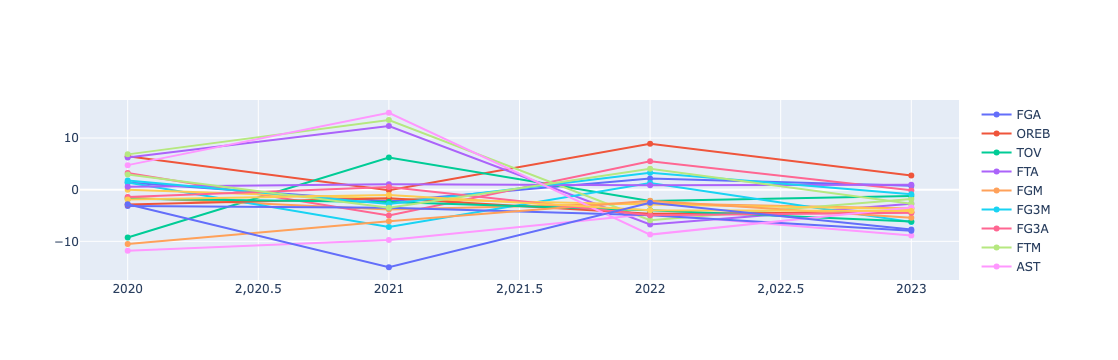

In [26]:
fig = go.Figure()
for col in comp_change_df.columns[1:]:
    fig.add_trace(go.Scatter(x=comp_change_df['season_start_year'],
                             y=comp_change_df[col], name=col))
fig.show()